Tutorial 04 - Data Visualistation - Exploratory Analysis
===

**Dr Chao Shu (chao.shu@qmul.ac.uk)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme(style="ticks")

# Set the random seed for reproducibility
np.random.seed(42)

## Introduction to the Dataset
---

In this lesson, you'll be working with a dataset regarding the prices and attributes of approximately 54,000 round-cut diamonds. You'll go through the steps of an explanatory data visualization, systematically starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. Finally, you'll work on polishing up selected plots from the analysis so that their main points can be clearly conveyed to others.

The dataset consists of almost 54,000 rows and 10 columns:

- **price**: Price in dollars. Data were collected in 2008.
- **carat**: Diamond weight. 1 carat is equal to 0.2 grams.
- **cut**: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- **color**: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- **clarity**: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- **x, y, z**: Diamond length, width, and depth, respectively, in mm.
- **table**: Ratio of the width of the top face of diamond to its overall width, as a percentage.
- **depth**: Proportional depth of the diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

For this case study, we will concentrate only on the variables in the top five bullet points: price and the four 'C's of diamond grade. **Our focus will be on answering the question about the degree of importance that each of these quality measures has on the pricing of a diamond**.

## Dataset Overview & Preliminary Wrangling
---

### Assess the Data

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. 

In [2]:
# load in the dataset into a pandas dataframe
diamonds_df = pd.read_csv('datasets/T04_diamonds.csv')

diamonds_df.shape

(53940, 10)

In [3]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
# descriptive statistics for numeric variables
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Clean the Data

In [6]:
# data wrangling, removing diamonds with inconsistent or missing data.
incorrect_depth = (np.abs(2 * diamonds_df['z'] / (diamonds_df['x'] + diamonds_df['y']) - diamonds_df['depth']/100) > 0.1)
no_size_info = ((diamonds_df['x'] == 0) & (diamonds_df['y'] == 0))
diamonds_df = diamonds_df[~incorrect_depth & ~no_size_info]
diamonds_df.shape

(53901, 10)

In [7]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                                categories=ordinal_var_dict[var])
    diamonds_df[var] = diamonds_df[var].astype(ordered_var)

### What is/are the main feature(s) of interest in your dataset?

We're most interested in figuring out what features are best for predicting the price of the diamonds in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We expect that carat will have the strongest effect on each diamond's price: the larger the diamond, the higher the price. It is also expected that the other big "C"s of diamonds: cut, color, and clarity, will have effects on the price, though to a much smaller degree than the main effect of carat.

## Univariate Exploration
---

Let's start by looking at the distribution of the main variable of interest: price. *Is the distribution skewed or symmetric? Is it unimodal or multimodal?*

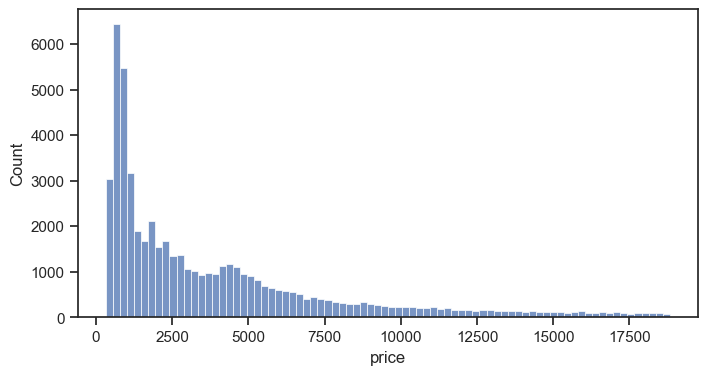

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(data=diamonds_df, x="price", ax=ax)

plt.show()

Price has a long-tailed distribution, with a lot of diamonds on the low price end, and few on the high price end. It would be better to transform it into log scale.

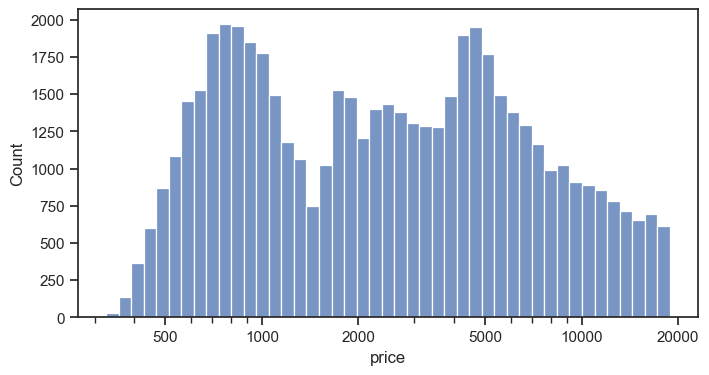

In [9]:
# univariate plot of diamond prices
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=diamonds_df, x='price', log_scale=10, ax=ax)

# Generate the x-ticks you want to apply
ticks = [500, 1000, 2000, 5000, 10000, 20000]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.show()

If we use matplotlib, we can use `ax.set_xscale('log')` to transform the x-axis.

In [10]:
# Check the range of price data in log scale
np.log10(diamonds_df['price'].describe())

count    4.731597
mean     3.594414
std      3.600601
min      2.513218
25%      2.977266
50%      3.380392
75%      3.726075
max      4.274689
Name: price, dtype: float64

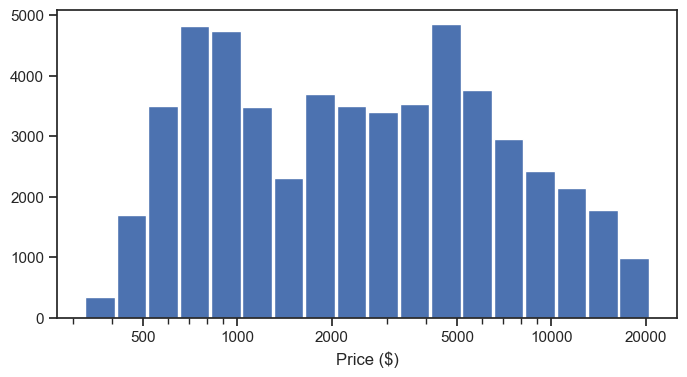

In [11]:
# univariate plot of diamond prices
log_binsize = 0.1
bins = 10 ** np.arange(np.log10(diamonds_df['price'].min()), np.log10(diamonds_df['price'].max()) + log_binsize, log_binsize)

# Generate the x-ticks you want to apply
ticks = [500, 1000, 2000, 5000, 10000, 20000]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(x=diamonds_df['price'], bins=bins, rwidth=0.94);

ax.set_xscale('log')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.set_xlabel("Price ($)")

plt.show()

**Findings**

When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak between 500 and 1000, and a second peak a little below 5000. Interestingly, there's a steep jump in frequency right before 2000, rather than a smooth ramp up.

Next up, the first predictor variable of interest: carat.

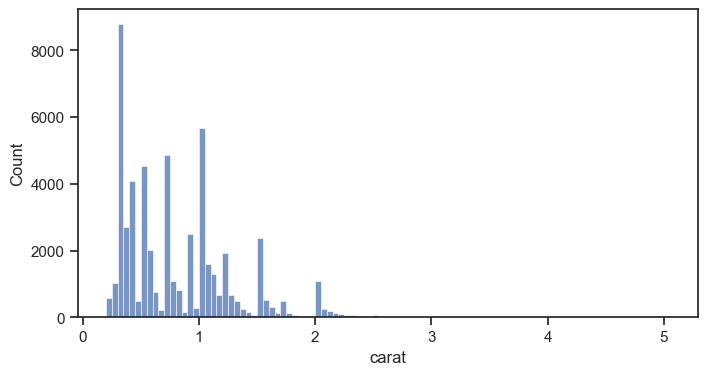

In [12]:
binsize = 0.05

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=diamonds_df, x='carat', binwidth=binsize, ax=ax)

plt.show()

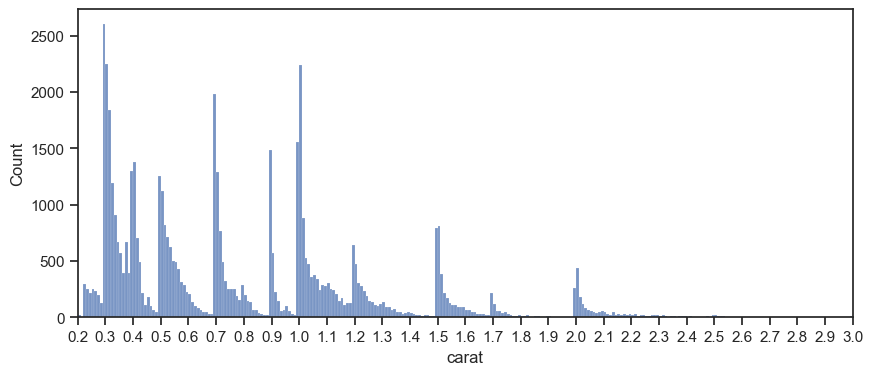

In [13]:
binsize = 0.01

fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(data=diamonds_df, x='carat', binwidth=binsize, ax=ax)

ax.set_xlim([diamonds_df['carat'].min(), 3])
ax.set_xticks(np.arange(0.2, 3.1, 0.1))

plt.show()

**Findings**

In the case of carat, the small bin size proves very illuminating. There are very large spikes in frequency at the bars with one digit of precision (e.g. 0.3, 0.7, 1.0); frequency quickly trails off until the next spike. These probably represent standard diamond sizes for use in jewelry.

Let's now move on to the other 'c' variables in the dataset: cut, color, and clarity. Since these features are categorical, we should use bar charts. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level.

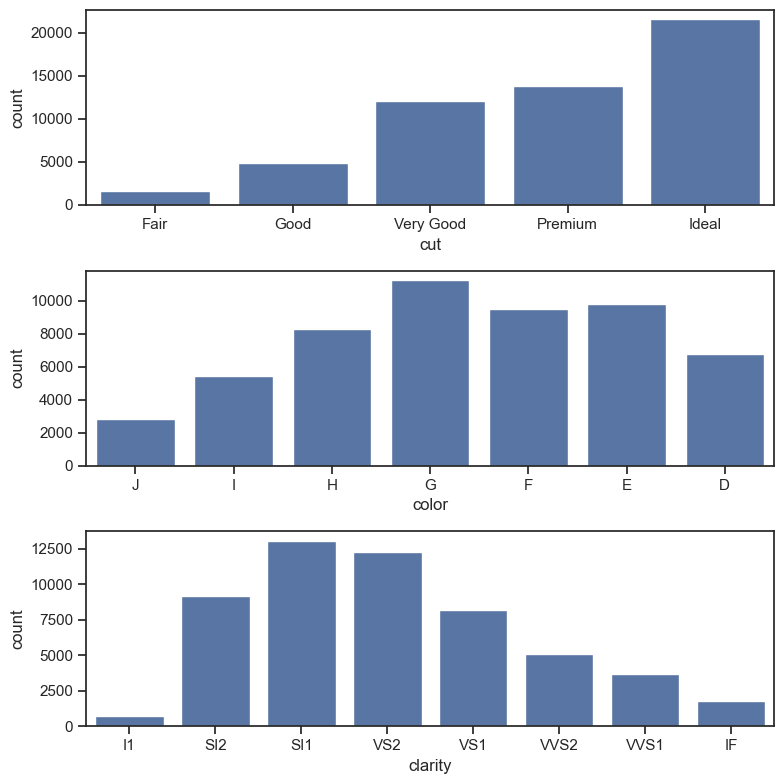

In [14]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows=3, figsize = [8, 8])

default_color = sns.color_palette()[0]
sns.countplot(data=diamonds_df, x='cut', color=default_color, ax=ax[0])
sns.countplot(data=diamonds_df, x='color', color=default_color, ax=ax[1])
sns.countplot(data=diamonds_df, x='clarity', color=default_color, ax=ax[2])

fig.tight_layout()
plt.show()

**Findings**

We can find that:

- **Cut**: The cut quality of the diamonds in the dataset is generally quite good, with most of them in the Premium or Ideal level. 
- **Color**: The distribution is roughly unimodal, with "G" as the most common color grade in this dataset. Most of the diamonds are also of color quality G or better. 
- **Clarity**, There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). Clarity grades become rarer as steps are taken up the scale. There are very few diamonds with visible inclusions (I1)

## Bivariate Exploration
---


In the previous section, we looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

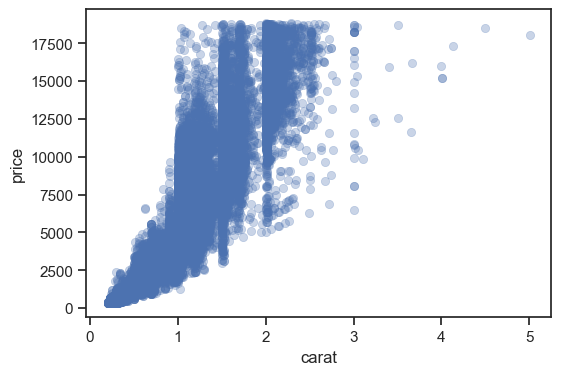

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(data=diamonds_df, x='carat', y='price', ax=ax, alpha=0.3, ec='face')  # Set edgecolor to face color to avoid grey area

plt.show()

The shape looks concave upwards when we plot the price against the carat directly. Let's use log scale for the price.

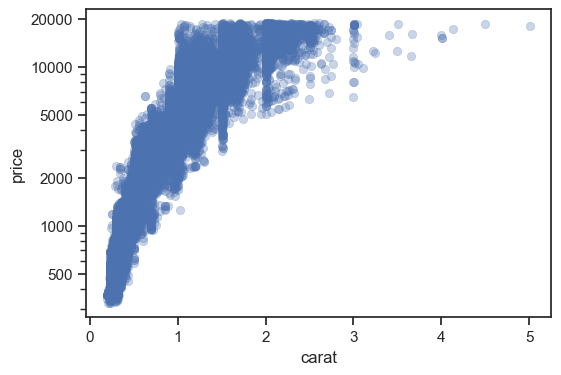

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(data=diamonds_df, x='carat', y='price', ax=ax, alpha=0.3, ec='face')  # Set edgecolor to face color to avoid grey area

# Generate the x-ticks you want to apply
ticks = [500, 1000, 2000, 5000, 10000, 20000]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

ax.set_yscale('log')
ax.set_yticks(ticks)
ax.set_yticklabels(labels)

plt.show()

Now the shape turns concave downwards, still not linear. This plot suggests from the concavity that we might want to also transform the 'carat' variable to see a linear trend. There also appears to be a price ceiling in the data.

Let's try to plot one of the size dimensions against price.

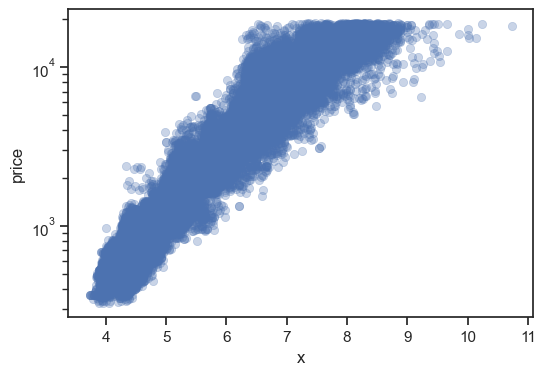

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(data=diamonds_df, x='x', y='price', ax=ax, alpha=0.3, ec='face')  # Set edgecolor to face color to avoid grey area

ax.set_yscale('log')

plt.show()

It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.

In [18]:
def cuberoot_trans(x, inverse=False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [19]:
# Apply the "cuberoot_trans" function to every value in the 'carat' column to calculate the cube root of carat value and save
# them in a new column called 'cr_carat'
diamonds_df['cr_carat'] = diamonds_df['carat'].apply(cuberoot_trans)
diamonds_df['cr_carat'].describe()

count    53901.000000
mean         0.893391
std          0.175392
min          0.584804
25%          0.736806
50%          0.887904
75%          1.013159
max          1.711115
Name: cr_carat, dtype: float64

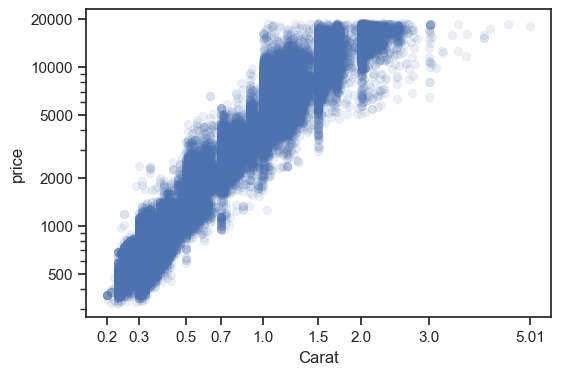

In [20]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(data=diamonds_df, x='cr_carat', y='price', ax=ax, alpha=0.1, ec='face')

# Generate the y-ticks you want to apply
yticks = [500, 1000, 2000, 5000, 10000, 20000]
# Convert ticks into string values, to be displayed along the y-axis
ylabels = ['{}'.format(v) for v in yticks]

# Generate the x-ticks you want to apply
carat_ticks = np.array([0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3, 5.01])
xticks = cuberoot_trans(carat_ticks)
# Convert ticks into string values, to be displayed along the x-axis
xlabels = ['{}'.format(v) for v in carat_ticks]

ax.set_yscale('log')
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_xlabel('Carat')

plt.show()

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity.

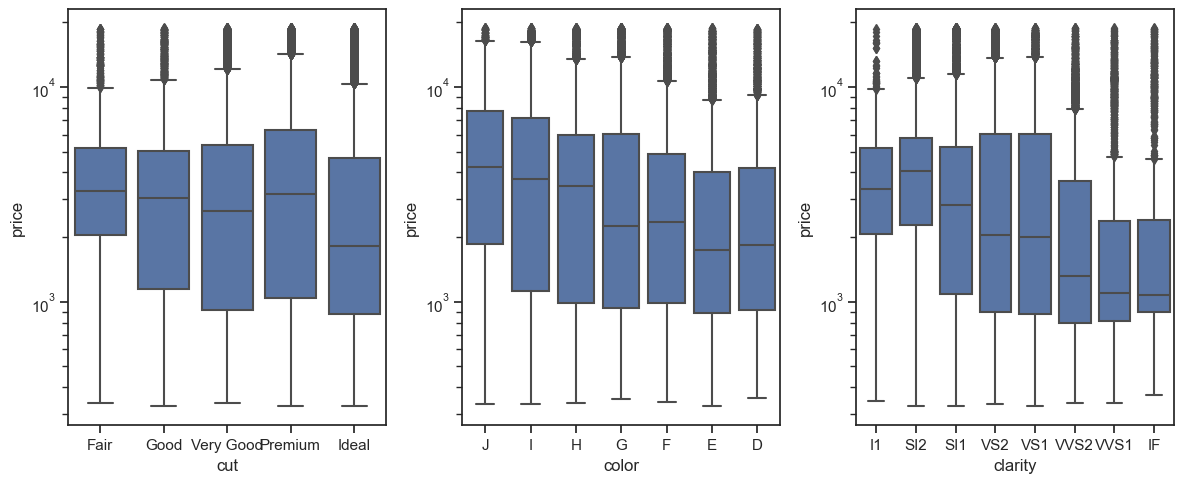

In [21]:
# bivariate plots of price vs. cut, color, clarity
base_color = sns.color_palette()[0]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(data=diamonds_df, x='cut', y='price', color=base_color, ax=axs[0])
axs[0].set_yscale('log')
sns.boxplot(data=diamonds_df, x='color', y='price', color=base_color, ax=axs[1])
axs[1].set_yscale('log')
sns.boxplot(data=diamonds_df, x='clarity', y='price', color=base_color, ax=axs[2])
axs[2].set_yscale('log')

fig.tight_layout()
plt.show()

It is interesting and unintuitive to find that the median price of diamonds decreases with increasing gem quality. A quick assumption is that the size of the diamonds with high quality tend to be smaller. Let's use [violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html) to find out carat of diamonds with different qualities.

A violin plot plays a similar role as a box plot. It shows the distribution of data points after grouping by one (or more) variables. Unlike a box plot, the smooth violin shape shows the probability density of the data. The width of the violin shape demonstrates the distribution and density of the data at different values. Wider sections mean more data points in that region.

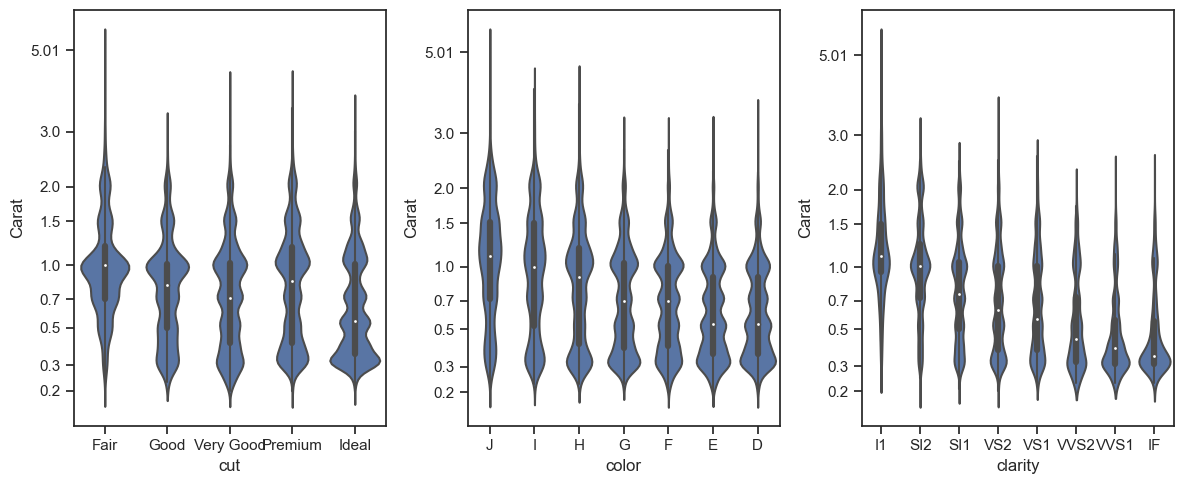

In [22]:
# bivariate plots of carat vs. cut, color, clarity
base_color = sns.color_palette()[0]

fig, axs = plt.subplots(1, 3, sharey=False, figsize=(12, 5))

sns.violinplot(data=diamonds_df, x='cut', y='cr_carat', color=base_color, ax=axs[0])
sns.violinplot(data=diamonds_df, x='color', y='cr_carat', color=base_color, ax=axs[1])
sns.violinplot(data=diamonds_df, x='clarity', y='cr_carat', color=base_color, ax=axs[2])

# Generate the y-ticks you want to apply
carat_ticks = np.array([0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3, 5.01])
yticks = cuberoot_trans(carat_ticks)
# Convert ticks into string values, to be displayed along the y-axis
ylabels = ['{}'.format(v) for v in carat_ticks]

for i in range(3):
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ylabels)
    axs[i].set_ylabel('Carat')

fig.tight_layout()
plt.show()

We indeed observed a decreasing weight with increasing quality. Let's plot price vs. quality and carat vs. quality together. We've transformed the carat values into their cube root, before we plot violin plot for price, let's transform all price values to log scale.

In [23]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse=False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

diamonds_df['log_price'] = diamonds_df['price'].apply(log_trans)

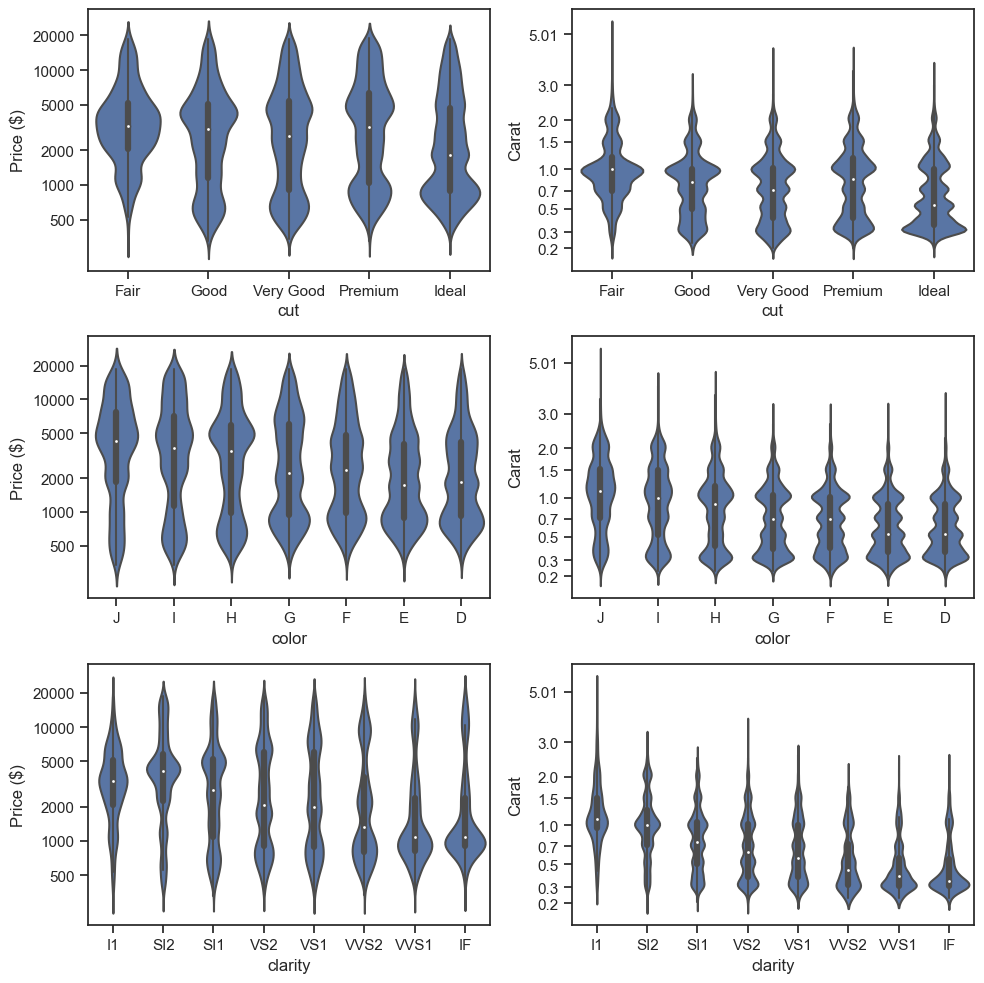

In [24]:
# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=[10, 10])

categoric_vars = ['cut', 'color', 'clarity']

# Generate the y-ticks you want to apply
price_ticks = np.array([500, 1000, 2000, 5000, 10000, 20000])
# Corresponding ticks for values in the 'log_price' column
log_price_ticks = log_trans(price_ticks)
# Convert ticks into string values, to be displayed along the y-axis
price_labels = ['{}'.format(v) for v in price_ticks]
# Generate the y-ticks you want to apply
carat_ticks = np.array([0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3, 5.01])
# Corresponding ticks for values in the 'cr_carat' column
cr_carat_ticks = cuberoot_trans(carat_ticks)
# Convert ticks into string values, to be displayed along the y-axis
carat_labels = ['{}'.format(v) for v in carat_ticks]

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data=diamonds_df, x=var, y='log_price', ax=ax[i, 0], color=default_color)
    ax[i, 0].set_yticks(log_price_ticks)  # Because we use 'log_price' column
    ax[i, 0].set_yticklabels(price_labels)  # Show the corresponding actual price
    ax[i, 0].set_ylabel('Price ($)')  # y-axis shows the actual price
    sns.violinplot(data=diamonds_df, x=var, y='cr_carat', ax=ax[i, 1], color=default_color)
    ax[i, 1].set_yticks(cr_carat_ticks)
    ax[i, 1].set_yticklabels(carat_labels)
    ax[i, 1].set_ylabel('Carat')  # y-axis shows the actual carat
    # ax[i, 1].set_ylim(cuberoot_trans(np.array([0.1, 3.5])))

fig.tight_layout()
plt.show()

The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It is highly suggested that the decrease in average price across increasing quality is due to the average diamond size decreasing with increasing quality. This is clearest in the plots across clarity, moderately visible with cut, and least evident with color. It will be interesting to see how the categories map in the multivariate analysis later.

We can also use correlation coefficient to check the relationships between different pairs of variables.

In [25]:
pearson_coeffs = diamonds_df.corr(method='pearson', numeric_only=True)
pearson_coeffs

,carat,depth,table,price,x,y,z,cr_carat,log_price
carat,1.000000,0.028719,0.181631,0.921556,0.977890,0.976980,0.977172,0.979726,0.920246
depth,0.028719,1.000000,-0.298122,-0.010753,-0.024789,-0.027926,0.097480,0.030588,0.001209
table,0.181631,-0.298122,1.000000,0.127218,0.196116,0.190135,0.155920,0.190760,0.158272
price,0.921556,-0.010753,0.127218,1.000000,0.887335,0.888931,0.882687,0.886188,0.895797
x,0.977890,-0.024789,0.196116,0.887335,1.000000,0.998738,0.991923,0.997710,0.960787
y,0.976980,-0.027926,0.190135,0.888931,0.998738,1.000000,0.991480,0.997180,0.961586
z,0.977172,0.097480,0.155920,0.882687,0.991923,0.991480,1.000000,0.997158,0.957332
cr_carat,0.979726,0.030588,0.190760,0.886188,0.997710,0.997180,0.997158,1.000000,0.961049
log_price,0.920246,0.001209,0.158272,0.895797,0.960787,0.961586,0.957332,0.961049,1.000000


Let's use heat map to visualise the directions and magnitudes of all the correlation coefficient.

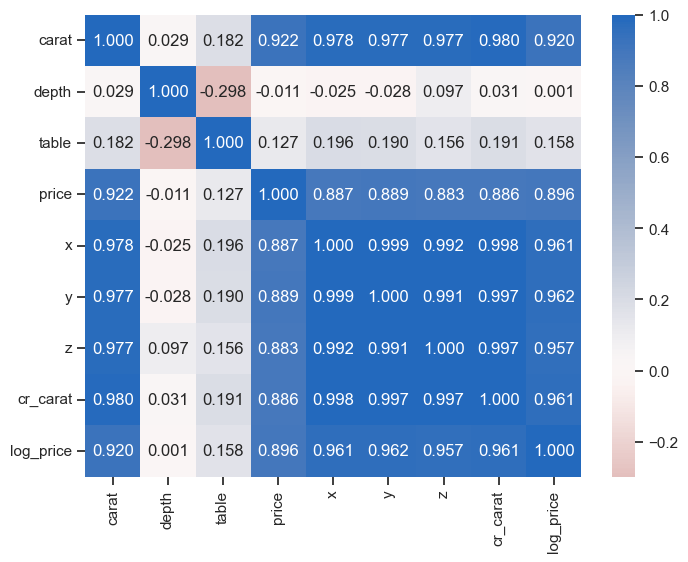

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data=pearson_coeffs, annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.show()

**Findings**

Price had a surprisingly high amount of correlation with the diamond weight, even before transforming the features. An approximately linear relationship was observed when price was plotted on a log scale and carat was plotted with a cube-root transform. The scatterplot that came out of this also suggested that there was an upper bound on the diamond prices available in the dataset, since the range of prices for the largest diamonds was much narrower than would have been expected, based on the price ranges of smaller diamonds.

There was also an interesting relationship observed between price and the categorical features. For all of cut, color, and clarity, lower prices were associated with increasing quality. One of the potentially major interacting factors is the fact that improved quality levels were also associated with smaller diamonds. This will have to be explored further in the next section.

## Multivariate Exploration
---

In the previous section, we looked at various bivariate relationships. We saw that the price in a log scale was approximately linearly related to the cube root of carat weight. We also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreases with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size/weight tending to be smaller for the diamonds with higher categorical grades.

Now, let's explore the relationships between price and categorical variables in a clearer way.

First, to avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. Since we see a lot of diamonds have weights of 0.3 and 1, let's first select diamonds in a small range around 1 carat weight.

In [27]:
# select diamonds of approximately 1 carat
diamonds_1carat_df = diamonds_df.query('carat >= 0.99 and carat <= 1.03')
print(diamonds_1carat_df.shape)
diamonds_1carat_df.describe()

(5222, 12)


,carat,depth,table,price,x,y,z,cr_carat,log_price
count,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000
mean,1.010632,61.961030,58.177499,5448.173880,6.412777,6.408317,3.970789,1.003522,3.717331
std,0.009386,1.813726,2.294755,1715.516598,0.101752,0.108872,0.069607,0.003101,0.126015
min,0.990000,53.000000,49.000000,1262.000000,5.720000,5.590000,3.580000,0.996655,3.101059
25%,1.000000,61.000000,57.000000,4306.000000,6.350000,6.350000,3.940000,1.000000,3.634074
50%,1.010000,62.100000,58.000000,5020.000000,6.410000,6.410000,3.980000,1.003322,3.700704
75%,1.020000,63.000000,60.000000,6288.000000,6.480000,6.480000,4.010000,1.006623,3.798513
max,1.030000,78.200000,68.000000,17590.000000,6.840000,6.770000,4.420000,1.009902,4.245266


Next, let's explore the relationship between price (one numerical variable), cut and colour (two categorical variables) by constructing a plot to show the effect of the two categorical variables on the price of diamonds, i.e., diamond price against cut and color quality features. 

There are a lot of ways to plot one numeric variable against two categorical variables. In this case, the clustered box plot or the clustered [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html) are the best choices. With the number of category combinations to be plotted (7 (color) x 5 (cut) = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.

In the three-variate plot blow, we put the numerical variable 'price' on the y-axis and one of the categorical variable 'color' on the x-axis to show the effect of colour on the price. At the same time, we use box plots with different hues (a degree of lightness, darkness, strength, etc. of a colour) to show price distributions with different cut grades under each color grade. In this way, we demonstrate the relationship between three variables.

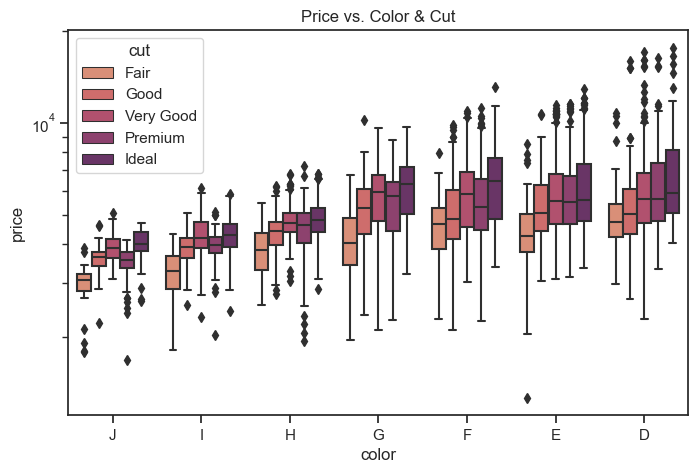

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=diamonds_1carat_df, x='color', y='price', hue='cut', palette='flare', ax=ax)
ax.set_yscale('log')
ax.set_title('Price vs. Color & Cut')
plt.show()

We can see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Furthermore, we choose a [sequential color scheme](https://seaborn.pydata.org/tutorial/color_palettes.html#sequential-color-palettes) for the third variable (cut) to show the ordinal nature of cut grades. 

However, the cluster box plots can be two crowded sometimes. We can consider to use clustered [point plots](https://seaborn.pydata.org/generated/seaborn.pointplot.html) instead of clustered box plots. A [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html) represents an estimate of central tendency (mean) for a numeric variable by the position of the dot and provides some indication of the uncertainty (e.g., confidence interval, standard deviation, etc.) around that estimate using error bars.

Next, let's use a point plot to check the impact of color and clarity on price. Usually we can set a dodge parameter to spread the clusters out.

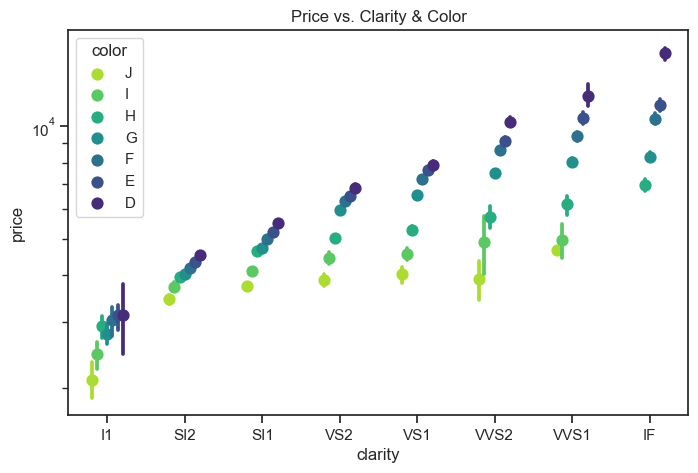

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.pointplot(data=diamonds_1carat_df, x='clarity', y='price', hue='color', join=False, dodge=0.4, palette='viridis_r', ax=ax)
ax.set_yscale('log')
ax.set_title('Price vs. Clarity & Color')
plt.show()

Let's try the last combination.

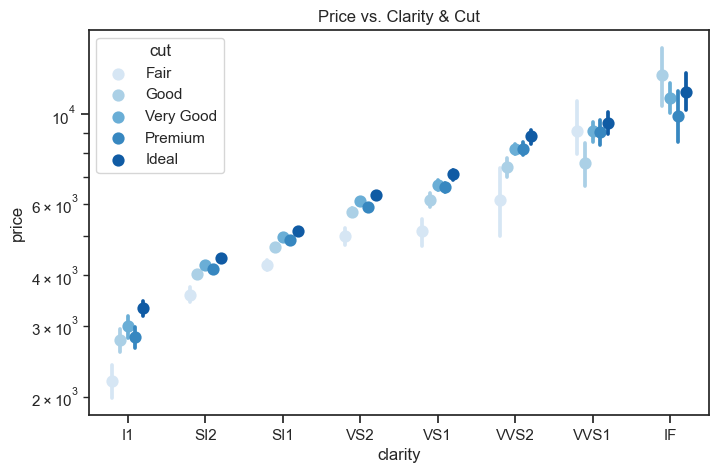

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.pointplot(data=diamonds_1carat_df, x='clarity', y='price', hue='cut', join=False, dodge=0.4, palette='Blues', ax=ax)
ax.set_yscale('log')
ax.set_title('Price vs. Clarity & Cut')
plt.show()

It shows the clear influence of clarity and cut on diamond price. The larger error bars on the right-hand side are due to there being fewer diamonds at higher clarity grades at this diamond size. There also appear to be fewer diamonds of grade 'Fair' on the higher clarity grades. Interestingly, none of diamonds in our dataset has 'Fair' cut grade on the highest 'IF' rating.

Next, let's carry out similar analyses for diamonds with weights around 0.3 carat.

In [31]:
# select diamonds of approximately 0.3 carat
diamonds_small_df = diamonds_df.query('carat >= 0.29 and carat <= 0.33')
print(diamonds_small_df.shape)
diamonds_small_df.describe()

(8012, 12)


,carat,depth,table,price,x,y,z,cr_carat,log_price
count,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000
mean,0.311690,61.768447,56.830517,708.687344,4.359269,4.367371,2.694720,0.677926,2.836774
std,0.010885,1.049359,2.006858,177.142826,0.067150,0.068408,0.041869,0.007871,0.109929
min,0.290000,51.000000,44.000000,334.000000,4.140000,4.050000,2.370000,0.661911,2.523746
25%,0.300000,61.200000,55.000000,572.750000,4.310000,4.320000,2.670000,0.669433,2.757965
50%,0.310000,61.800000,57.000000,698.000000,4.360000,4.370000,2.700000,0.676790,2.843855
75%,0.320000,62.400000,58.000000,837.000000,4.410000,4.420000,2.720000,0.683990,2.922725
max,0.330000,66.700000,67.000000,2366.000000,4.850000,4.790000,2.950000,0.691042,3.374015


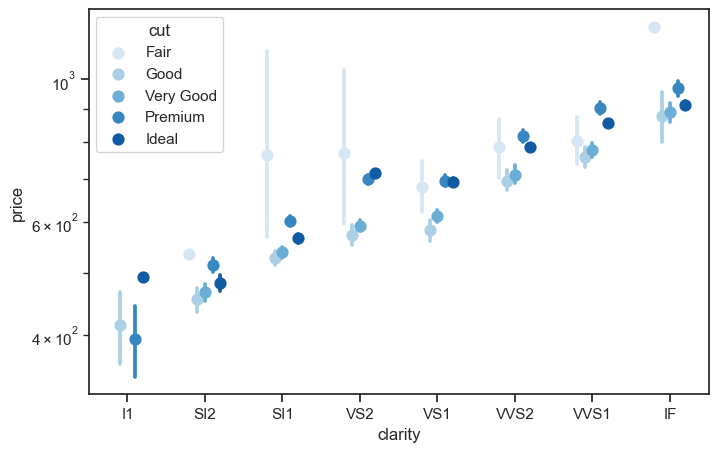

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.pointplot(data=diamonds_small_df, x='clarity', y='price', hue='cut', palette='Blues', join=False, dodge=0.4, ax=ax)
ax.set_yscale('log')

The plot is less clear for the smaller diamonds around 0.3 carat. There are few diamonds in the lower clarity grades and more on the high-clarity grades at this diamond size. Interestingly, diamonds of the 'Fair' cut grade are generally higher-priced than the 'Good' and 'Very Good' cuts, but there's no good explanation for this from this plot.

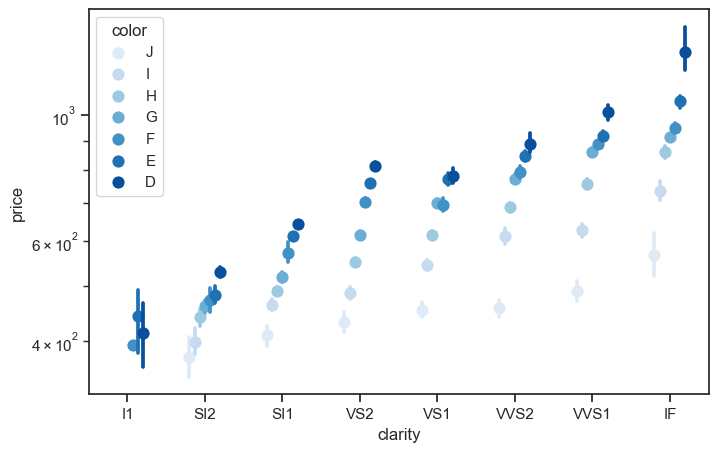

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.pointplot(data=diamonds_small_df, x='clarity', y='price', hue='color', palette='Blues', join=False, dodge=0.4, ax=ax)
ax.set_yscale('log')

The hierarchy in pricing by color is clear when clustered across clarity values. The pattern looks more systematic than the "cut by clarity" pointplots.

**Findings**

We extended our investigation of price against diamond size in this section by looking at the impact of the three categorical quality features. The multivariate exploration shows that there indeed is a positive effect of increased quality grade on diamond price, but in the dataset, this is initially hidden by the fact that diamonds with higher grades tend to have smaller sizes/weights, which leads to lower prices overall. Controlling for the carat weight of a diamond shows the effect of the other C's of diamonds more clearly. This effect was clearest for the color and clarity variables, with less systematic trends for cut.